# Judul : Prediksi Harga XAUUSD. 
#### Identitas : 
##### NIM : A11.2022.14532.
##### Nama : Najma Aura Dias Prameswari. 

# Ringkasan dan Permasalahan :
#### Ringkasan : 
Tujuan dari proyek ini adalah untuk membangun model prediksi nilai entry berdasarkan indikator teknikal menggunakan algoritma Random Forest Regressor. Dataset yang digunakan mencakup data trading dengan beberapa fitur utama seperti entry price, TP, SL dan indikator teknikal tambahan yang dihitung menggunakan library TA-Lib


#### Permasalahan :
Bagaimana memanfaatkan data trading historis dengan indikator teknikal untuk memprediksi nilai entry menggunakan model Random Forest Regressor sehingga dapat memberikan hasil prediksi dengan akurasi yang baik

# Penjelasan Dataset, Exploratory Data Analysis (EDA), dan Proses Features Dataset : 

#### Dataset : 
Dataset memuat data trading historis dengan kolom :
1. Pair : Pasangan mata uang
2. Action : Aksi trading (Buy / Sell)
3. Tanggal Entry dan Tanggal Exit : Waktu masuk dan keluar trading
4. Enrty, TP, SL : Harga entry, take profit dan stop loss
5. Keterangan : Informasi tambahan

#### Proses Dataset : 
Proprocessing data dilakukan dengan langkah : 
1. Mengubah tipe data kolom yang relevan
2. Menghapus nilai kosong
3. Menambahkan indikator teknikal : SMA (10), RSI (14), Bollinger Bands

#### Exploratory Data Analysis (EDA):
1. Distribusi data Entry price, TP, SL
2. Visualisasi indikator teknikal (SMA, RSI, Bollinger Bands) terhadap harga Entry
3. Korelasi antara fitur - fitur untuk memahami hubungan antara variabel

#### Proses Features Dataset : 
1. Pembersihan Data : Menghapus nilai kosong setelah perhitungan indikator
2. Normalisasi Fitur : Menggunakan MinMaxScaler untuk menyamakan skala fitur
3. Pemilihan Fitur : Entry price, TP, SL dan indikator teknikal

# Proses Learning / Modeling : 
##### Arsitektur : 
1. Random Forest dengan 300 estimators
2. Kedalaman maksimal pohon 15 
3. Minimum sampel split 5
4. Minimum sampel leaf 2
5. Random State untuk replikasi hasil 

##### Evaluasi :
Menggunakan metrik Mean Absolute Error (MAE)

![Alur Penyelesaian Proyek](alur_penyelesaian_proyek.png)


# Performa Model : 
1. MAE : Hasil evaluasi menunjukkan error rata - rata antara prediksi model dengan nilai aktual
2. Plot hasil prediksi menunjukkan bahwa model mampu memetakan pola data dengan baik, meskipun terdapat perbedaan pada beberapa titik

# Diskusi Hasil dan Kesimpulan : 
#### Disukusi Hasil : 
1. Penambahan indikator teknikal meningkatkan informasi yang diberikan ke model, yang berpotensi meningkatkan performa
2. Namun, indikator teknikal seperti SMA, RSI memerlukan penyesuaian parameter agar sesuai dengan karakteristik data

#### Kesimpulan : 
1. Random Forest memberikan prediksi Entry price yang cukup akurat dengan indikator teknikal
2. Model ini bisa menjadi alat bantu analisis, tetapi tetap memerlukan validasi lebih lanjut di kondisi pasar nyata

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import talib
import matplotlib.pyplot as plt

In [2]:
# memuat dataset
# membaca file dataset dengan format csv menggunakan pandas
file_path = r"C:\Users\HP\Documents\data mining\backtest-template-v2 (10).csv"  
data = pd.read_csv(file_path, delimiter=';')


In [3]:
# mengubah nama kolom untuk mempermudah pemahaman
data.columns = ["Pair", "Action", "Tanggal Entry", "Tanggal Exit", "Entry", "TP", "SL", "Keterangan"]

# mengonversi kolom ke tipe data yang sesuai untuk analisis lebih lanjut
data['Tanggal Entry'] = pd.to_datetime(data['Tanggal Entry'], errors='coerce')
data['Tanggal Exit'] = pd.to_datetime(data['Tanggal Exit'], errors='coerce')
data['Entry'] = pd.to_numeric(data['Entry'], errors='coerce')
data['TP'] = pd.to_numeric(data['TP'], errors='coerce')
data['SL'] = pd.to_numeric(data['SL'], errors='coerce')

# menghapus baris yang memiliki nilai kosong
data_cleaned = data.dropna()


In [4]:
# menambahkan indikator teknikal seperti simple moving average (SMA)
# , relative strength index (RSI) dan bollinger bands (BB)
data_cleaned['SMA_10'] = talib.SMA(data_cleaned['Entry'], timeperiod=10)
data_cleaned['RSI'] = talib.RSI(data_cleaned['Entry'], timeperiod=14)
data_cleaned['Upper_BB'], data_cleaned['Middle_BB'], data_cleaned['Lower_BB'] = talib.BBANDS(data_cleaned['Entry'], timeperiod=20)


In [5]:
# menghapus baris yang memiliki nilai kosong
data_cleaned = data_cleaned.dropna()


In [6]:
# memilih fitur untuk model dan menentukan target (y).
features = ['Entry', 'TP', 'SL', 'SMA_10', 'RSI', 'Upper_BB', 'Lower_BB']
X = data_cleaned[features].values
y = data_cleaned['Entry'].values


In [7]:
# menormalisasi fitur untuk skala yang seragam.
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


In [8]:
# membagi data menjadi data pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [ ]:
# melatih model random forest dengan parameter tertentu
rf_model = RandomForestRegressor(
    n_estimators=300,  # jumlah pohon
    max_depth=15,  # kedalaman maksimum setiap pohon
    min_samples_split=5,  # sampel minimum untuk membagi simpul
    min_samples_leaf=2,  # sampel minimum per daun
    random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, random_state=42)

In [10]:
# Memprediksi data uji  
y_pred = rf_model.predict(X_test)


In [11]:
# menghitung Mean Absolute Error (MAE).
mae = mean_absolute_error(y_test, y_pred)
print("Test Set MAE with Technical Indicators:", mae)


Test Set MAE with Technical Indicators: 4.154954282639859


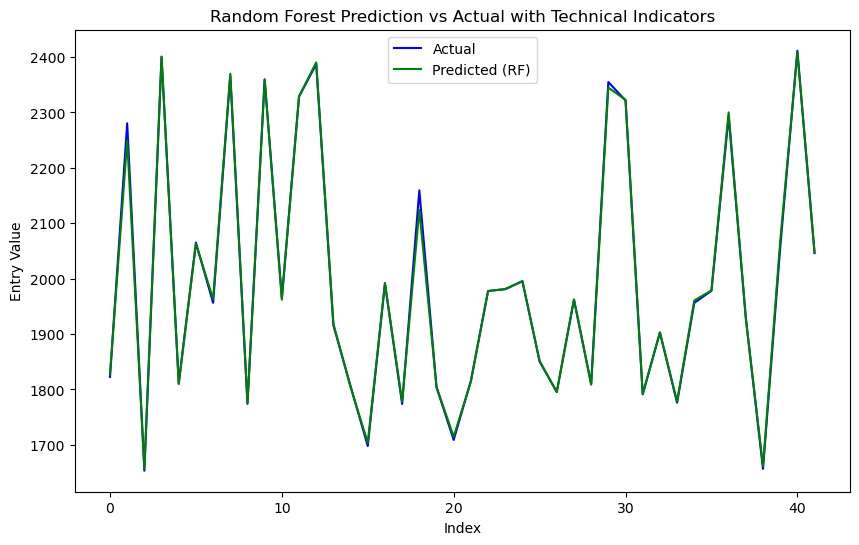

In [ ]:
# Membuat plot untuk membandingkan hasil prediksi dengan nilai aktual.
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted (RF)", color="green")
plt.title("Random Forest Prediction vs Actual with Technical Indicators")
plt.xlabel("Index")
plt.ylabel("Entry Value")
plt.legend()
plt.show()


In [13]:
# Simpan model dan scaler
import joblib
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved!")

Model and scaler saved!
